In [1]:
import cv2
from matplotlib import pyplot as plt
from edge_detection import*
import os

In [2]:
cmaps = 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [3]:
img = cv2.imread('4.jpg')
opening = create_Mathematical_Morphology_for_image(img)
mathematical_morphology_sobel_image = create_sobel_filter_for_image(image=opening, x_kernel= 3, y_kernel=3, threshold_value=100)

sobel_image = create_sobel_filter_for_image(image=img, x_kernel= 3, y_kernel=3, threshold_value=100)
type(img)

numpy.ndarray

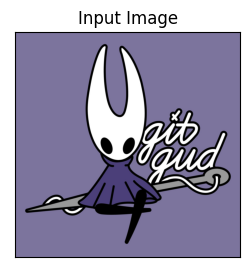

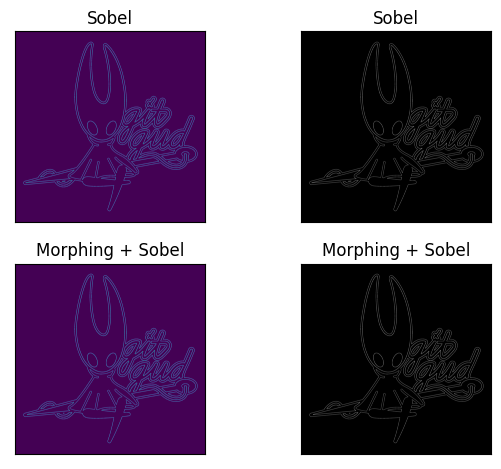

In [4]:
plt.subplot(121),plt.imshow(img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(224),plt.imshow(mathematical_morphology_sobel_image, cmap='gray')
plt.title('Morphing + Sobel'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(sobel_image, cmap='gray')
plt.title("Sobel"), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(mathematical_morphology_sobel_image)
plt.title('Morphing + Sobel'), plt.xticks([]), plt.yticks([])
plt.subplot(221),plt.imshow(sobel_image)
plt.title("Sobel"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

In [5]:
test_path = r"BSDS500\data/images/test"
train_path = r"BSDS500\data\images\train"
validation_path = r"BSDS500\data\images\val"


In [6]:
def read_images(path):
    return os.listdir(path)

In [44]:
read_images(test_path)

['100007.jpg',
 '100039.jpg',
 '100099.jpg',
 '10081.jpg',
 '101027.jpg',
 '101084.jpg',
 '102062.jpg',
 '103006.jpg',
 '103029.jpg',
 '103078.jpg',
 '104010.jpg',
 '104055.jpg',
 '105027.jpg',
 '106005.jpg',
 '106047.jpg',
 '107014.jpg',
 '107045.jpg',
 '107072.jpg',
 '108004.jpg',
 '108036.jpg',
 '108069.jpg',
 '109055.jpg',
 '112056.jpg',
 '112090.jpg',
 '117025.jpg',
 '118015.jpg',
 '118031.jpg',
 '118072.jpg',
 '120003.jpg',
 '120093.jpg',
 '123057.jpg',
 '128035.jpg',
 '130014.jpg',
 '130066.jpg',
 '134049.jpg',
 '134067.jpg',
 '140006.jpg',
 '140088.jpg',
 '14085.jpg',
 '14092.jpg',
 '141012.jpg',
 '141048.jpg',
 '145059.jpg',
 '145079.jpg',
 '146074.jpg',
 '147077.jpg',
 '147080.jpg',
 '15011.jpg',
 '15062.jpg',
 '156054.jpg',
 '157032.jpg',
 '157087.jpg',
 '159002.jpg',
 '159022.jpg',
 '160006.jpg',
 '16004.jpg',
 '160067.jpg',
 '16068.jpg',
 '161045.jpg',
 '163004.jpg',
 '163096.jpg',
 '164046.jpg',
 '168084.jpg',
 '17067.jpg',
 '175083.jpg',
 '176051.jpg',
 '179084.jpg',
 '1

In [7]:
def read_images_from_path(path):
    cv_images = []
    for image in read_images(path):
        image = cv2.imread(f"{test_path}/{image}")
        cv_images.append(image)
    return cv_images

In [56]:
cv_images = read_images_from_path(test_path)
sobel_cv_images = []
for cv_image in cv_images:
    cv_image = create_Mathematical_Morphology_for_image(cv_image)
    sobel_cv_images.append(create_sobel_filter_for_image(image=cv_image, x_kernel= 3, y_kernel=3, threshold_value=150))


In [57]:
def show_image(image, cmap = "gray", title = "Input Image"):
    plt.imshow(image, cmap=cmap)
    plt.title(title)#, plt.xticks([]), plt.yticks([])
    plt.show()

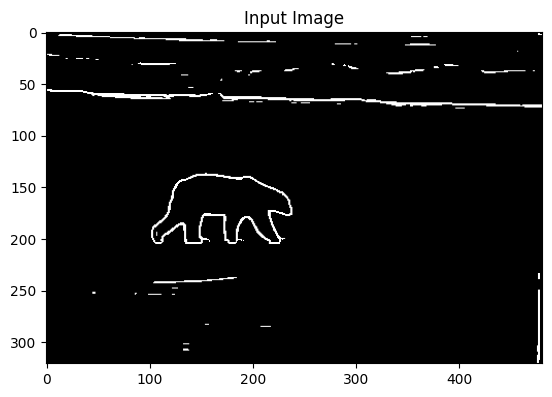

In [58]:
show_image(sobel_cv_images[0])


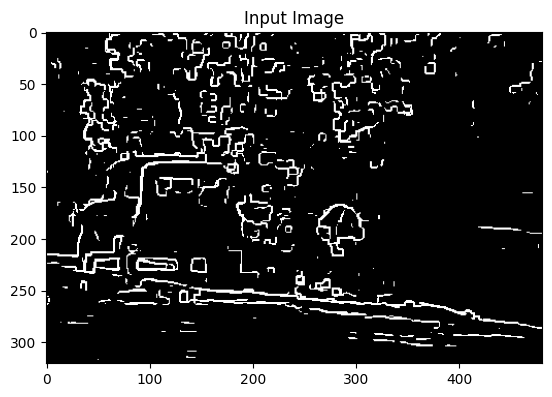

In [59]:
show_image(sobel_cv_images[6])

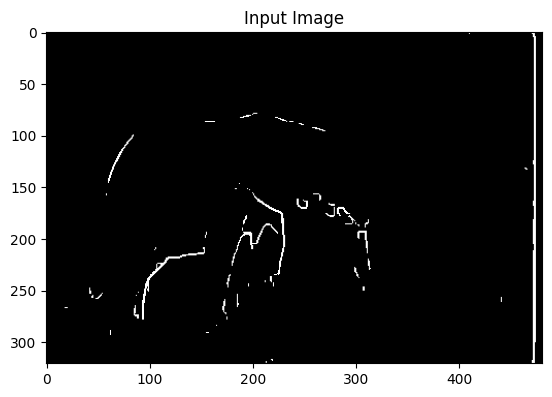

In [60]:
show_image(sobel_cv_images[15])

In [61]:
import scipy.io

# Load the ground truth for a specific image
gt_path = '2018.mat'
gt_data = scipy.io.loadmat(gt_path)['groundTruth'][0]

# # Access the ground truth edge map for the first annotator
# gt_edge_map = gt_data['Boundaries'][0][0]

# # Extract the numpy array from the list
# gt_edge_map = gt_edge_map.astype(float) / 255.0  # normalize to [0, 1]

# Do something with the ground truth edge map (e.g. evaluate an edge detector)


In [62]:
gt_data[0][0][0][0][0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [63]:
gt_data[0][0][0][0]

array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       ...,
       [36, 36, 36, ..., 36, 36, 36],
       [36, 36, 36, ..., 36, 36, 36],
       [36, 36, 36, ..., 36, 36, 36]], dtype=uint16)

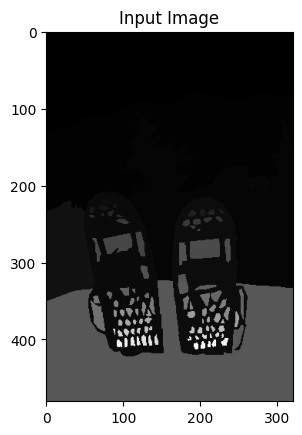

In [67]:
edges = gt_data[0][0][0][0]
show_image(gt_data[0][0][0][0])

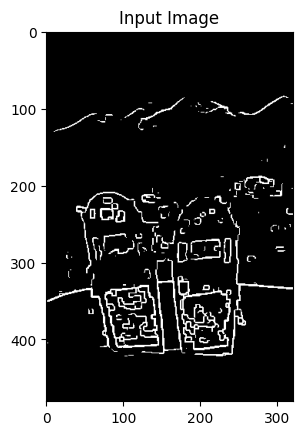

In [68]:
gt_edges = sobel_cv_images[84]
show_image(sobel_cv_images[84])

In [76]:
import skimage.metrics
# Calculate evaluation metrics
mse = ((gt_edges - edges) ** 2).mean()
print("MSE:", mse)

MSE: 3716.3701659963344


In [79]:
import cv2
import numpy as np

def evaluate_image(image, ground_truth):
  """Evaluates an image against a ground truth.

  Args:
    image: The image to evaluate.
    ground_truth: The ground truth for the image.

  Returns:
    A tuple of (accuracy, precision, recall).
  """

  # Convert the image and ground truth to NumPy arrays.
  image_np = np.array(image)
  ground_truth_np = np.array(ground_truth)

  # Get the predictions from the image.
  predictions = cv2.connectedComponents(image_np)

  # Calculate the accuracy, precision, and recall.
  accuracy = np.sum(predictions == ground_truth_np) / predictions.size
  precision = np.sum(predictions == ground_truth_np) / np.sum(predictions)
  recall = np.sum(predictions == ground_truth_np) / np.sum(ground_truth_np)

  return accuracy, precision, recall

In [80]:
evaluate_image(edges, gt_edges)

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\connectedcomponents.cpp:5632: error: (-215:Assertion failed) iDepth == CV_8U || iDepth == CV_8S in function 'cv::connectedComponents_sub1'
